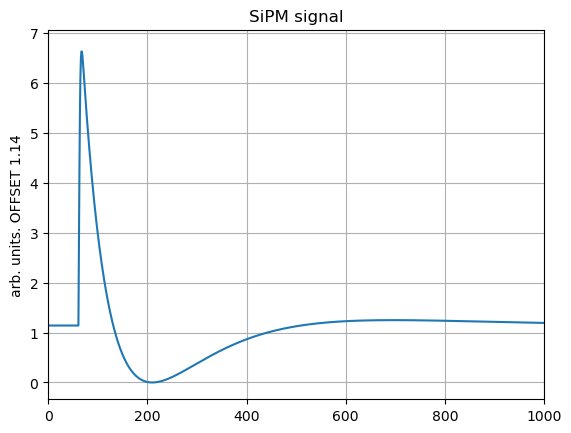

In [33]:
import numpy as np
import matplotlib.pyplot as plt

t = np.zeros((1, 4096))[0]  #Zeros array declaration
t[61], t[1999], t[2699] = 1, 1, 1

f = 2**30
#coeffs array denominator
tf_den = np.array([1, -3.937810904770624,
                  6.059560578445686,  -4.543872307687556,
                  1.660365605946772,  -0.238242823642825])
#coeffs array numerator 
tf_num = np.array([0,  1.589921349755122,  -3.245061777284015,
                  1.961963726121936, -0.548466823725762,   0.241643424903580])

d, n = [round(coef * f) for coef in tf_den], [round(coef * f) for coef in tf_num]

x, y = t, np.zeros((1, 4096))[0]
den, num = [], []
for i in range(6, 4096):
    y_rec = y[i-1]*d[1] + y[i-2]*d[2] + y[i-3]*d[3] + y[i-4]*d[4] + y[i-5]*d[5]
    x_rec = x[i]*n[0] + x[i-1]*n[1] + x[i-2]*n[2] + x[i-3]*n[3] + x[i-4]*n[4] + x[i-5]*n[5]
    den.append(y_rec)
    num.append(x_rec)
    y[i] = (x_rec - y_rec)/d[0]
    
    if i>60:    #??????? esto que proposito tiene
        a = 1

#Offset for negative values
y_min = abs(min(y))
y  = y + abs(min(y))
plt.plot(y)
plt.title('SiPM signal')
plt.ylabel(f"arb. units. OFFSET {y_min.round(2)}")
plt.xlim(0, 1000)
plt.grid()
plt.show()
